SMS Spam Dataset: AI model that can classify SMS messages as spam or legitimate

In [89]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
import re
import string 
import nltk
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer ##for cleaning 
import warnings 
warnings.filterwarnings("ignore")

In [91]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='ISO-8859-1')

In [92]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [94]:
data = data[['v1', 'v2']]
data.columns = ['Class', 'message']

In [95]:
stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

data["CleanMessage"] = data["message"].apply(cleaning_data)

In [96]:
data

,Class,message,CleanMessage
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact pound prize claim easy call...
5568,ham,Will Ì_ b going to esplanade fr home?,going esplanade home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [97]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["CleanMessage"])

# OneHotEncoder for "kind" column
encoder = OneHotEncoder(sparse=False, drop='first')
Y = encoder.fit_transform(data[["Class"]])
X_combined = np.hstack((X.toarray(), Y))

print(X_combined)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


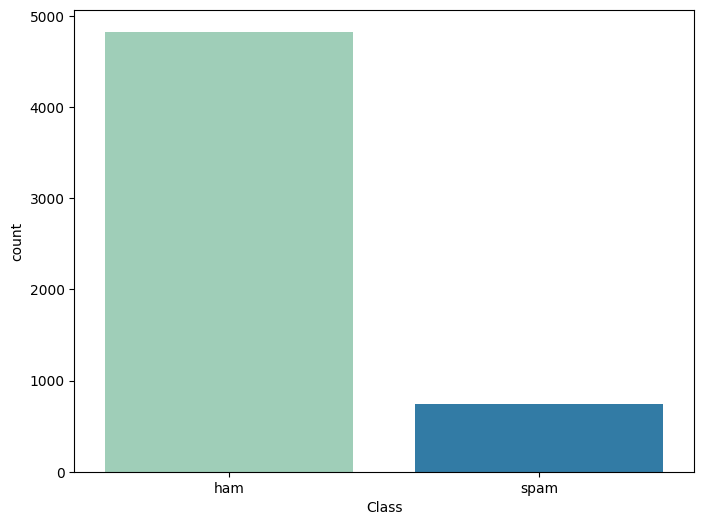

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=data, palette="YlGnBu")
plt.show()

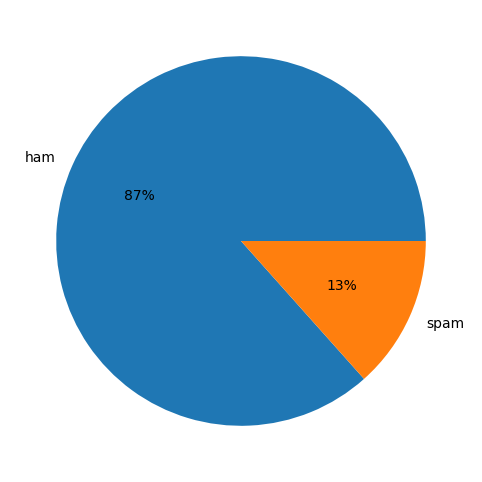

In [99]:
plt.figure(figsize=(8, 6))
kind_counts = data["Class"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

Model Train

In [100]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [101]:
nvb = MultinomialNB()
nvb.fit(X_train,Y_train)

MultinomialNB()

In [102]:
y_pred = nvb.predict(X_test)

In [103]:
accuracy = nvb.score(X_train,Y_train)
print("Accuracy: ", accuracy)

Accuracy:  0.9762171864482836


In [104]:
validaccuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", validaccuracy)

Validation Accuracy: 0.9614349775784753


In [105]:
y_pred = nvb.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [106]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       965
         1.0       0.99      0.72      0.83       150

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [107]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[964   1]
 [ 42 108]]


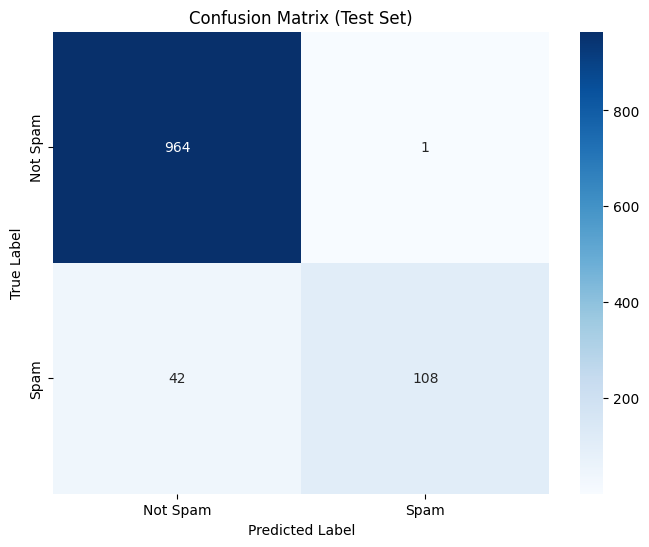

In [108]:
# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()